<a href="https://colab.research.google.com/github/alvaro-salgado/AA_MCD/blob/main/Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reporte Final


Aprendizaje supervisado

In [118]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score,recall_score,f1_score
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import silhouette_score




In [167]:
# Cargar el dataset
file_path = '/content/train.csv'
data = pd.read_csv(file_path)
datos = pd.read_csv(file_path)

Preprocesamiento de los datos


In [168]:
# Mapear etiquetas de actividad de inglés a español
activity_labels = {
    "WALKING": "Caminar",
    "WALKING_UPSTAIRS": "Subiendo escaleras",
    "WALKING_DOWNSTAIRS": "Bajando escaleras",
    "SITTING": "Sentado",
    "STANDING": "De pie",
    "LAYING": "Acostado"
}

# Ver las etiquetas originales únicas
original_labels = data['Activity'].unique()
print("Etiquetas originales:", original_labels)

# Traducir las etiquetas de la columna 'Activity'
data['Activity'] = data['Activity'].map(activity_labels)

# Verificar la traducción
translated_labels = data['Activity'].unique()
print("Etiquetas traducidas:", translated_labels)

Etiquetas originales: ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']
Etiquetas traducidas: ['De pie' 'Sentado' 'Acostado' 'Caminar' 'Bajando escaleras'
 'Subiendo escaleras']


In [169]:
# Convertir la columna 'Activity' en etiquetas numéricas
label_encoder = LabelEncoder()
data['Activity'] = label_encoder.fit_transform(data['Activity'])

# Separar características y etiquetas
X = data.drop(['Activity', 'subject'], axis=1)
y = data['Activity']

In [170]:
label_encoder.classes_

array(['Acostado', 'Bajando escaleras', 'Caminar', 'De pie', 'Sentado',
       'Subiendo escaleras'], dtype=object)

In [160]:
print(y.unique())
datos['Activity'].unique()

[2 1 0 3 4 5]


array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [122]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
# Normalizar los datos (opcional pero recomendado para SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Aprendizaje Supervisado (SVM)

In [75]:
# Definir una lista de parámetros para probar
kernels = ['linear', 'poly', 'rbf']
C_values = [0.1, 1, 10]
gamma_values = [0.1, 1, 10]

In [101]:
# Función para evaluar el modelo SVM
def evaluate_svm(kernel, C, gamma=None):
    if kernel == 'linear':
        model = SVC(kernel=kernel, C=C)
    else:
        model = SVC(kernel=kernel, C=C, gamma=gamma)

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Calcular métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    return {
        'kernel': kernel,
        'C': C,
        'gamma': gamma,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': conf_matrix
    }


In [117]:
# Evaluar SVM con diferentes parámetros
svm_results = []
for kernel in kernels:
    for C in C_values:
        if kernel == 'linear':
            result = evaluate_svm(kernel, C)
            svm_results.append(result)
        else:
            for gamma in gamma_values:
                result = evaluate_svm(kernel, C, gamma)
                svm_results.append(result)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

In [116]:
# Mostrar resultados
""""
for result in svm_results:
    print(f"SVM Kernel: {result['kernel']}, C: {result['C']}, Gamma: {result['gamma']}")
    print("Accuracy:", result['accuracy'])
    print("Precision:", result['precision'])
    print("Recall:", result['recall'])
    print("F1 Score:", result['f1_score'])
    print("Confusion Matrix:\n", result['confusion_matrix'])
    print("-" * 50)

    """

'"\nfor result in svm_results:\n    print(f"SVM Kernel: {result[\'kernel\']}, C: {result[\'C\']}, Gamma: {result[\'gamma\']}")\n    print("Accuracy:", result[\'accuracy\'])\n    print("Precision:", result[\'precision\'])\n    print("Recall:", result[\'recall\'])\n    print("F1 Score:", result[\'f1_score\'])\n    print("Confusion Matrix:\n", result[\'confusion_matrix\'])\n    print("-" * 50)\n\n    '

In [104]:
svm_results_df = pd.DataFrame(svm_results)
svm_results_df.sort_values(by = 'accuracy', ascending = False)

,kernel,C,gamma,accuracy,precision,recall,f1_score,confusion_matrix
10,poly,10.0,1.0,0.985724,0.985844,0.985724,0.985722,"[[280, 0, 0, 0, 0, 0], [0, 203, 1, 0, 0, 2], [..."
9,poly,10.0,0.1,0.985724,0.985844,0.985724,0.985722,"[[280, 0, 0, 0, 0, 0], [0, 203, 1, 0, 0, 2], [..."
11,poly,10.0,10.0,0.985724,0.985844,0.985724,0.985722,"[[280, 0, 0, 0, 0, 0], [0, 203, 1, 0, 0, 2], [..."
3,poly,0.1,0.1,0.985724,0.985844,0.985724,0.985722,"[[280, 0, 0, 0, 0, 0], [0, 203, 1, 0, 0, 2], [..."
4,poly,0.1,1.0,0.985724,0.985844,0.985724,0.985722,"[[280, 0, 0, 0, 0, 0], [0, 203, 1, 0, 0, 2], [..."
5,poly,0.1,10.0,0.985724,0.985844,0.985724,0.985722,"[[280, 0, 0, 0, 0, 0], [0, 203, 1, 0, 0, 2], [..."
6,poly,1.0,0.1,0.985724,0.985844,0.985724,0.985722,"[[280, 0, 0, 0, 0, 0], [0, 203, 1, 0, 0, 2], [..."
7,poly,1.0,1.0,0.985724,0.985844,0.985724,0.985722,"[[280, 0, 0, 0, 0, 0], [0, 203, 1, 0, 0, 2], [..."
8,poly,1.0,10.0,0.985724,0.985844,0.985724,0.985722,"[[280, 0, 0, 0, 0, 0], [0, 203, 1, 0, 0, 2], [..."
0,linear,0.1,NaN,0.984364,0.984379,0.984364,0.984363,"[[280, 0, 0, 0, 0, 0], [0, 205, 1, 0, 0, 0], [..."


Crear el modelo con los mejores parámetros

In [105]:
# Crear un clasificador SVM
#svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier = SVC(kernel='poly', C=10, gamma=0.1 , random_state=42)


In [106]:
# Entrenar el clasificador SVM
svm_classifier.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.1, kernel='poly', random_state=42)

In [107]:
# Predecir con el conjunto de prueba
y_pred = svm_classifier.predict(X_test_scaled)

In [124]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo SVM: {accuracy:.2f}')

Precisión del modelo SVM: 0.99


In [109]:
# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

In [171]:
# Imprimir un reporte de clasificación detallado
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Reporte de Clasificación:
                    precision    recall  f1-score   support

          Acostado       0.97      0.91      0.94       280
 Bajando escaleras       0.58      0.75      0.66       206
           Caminar       0.44      0.60      0.51       247
            De pie       0.00      0.00      0.00       276
           Sentado       0.47      0.92      0.62       262
Subiendo escaleras       0.00      0.00      0.00       200

          accuracy                           0.54      1471
         macro avg       0.41      0.53      0.45      1471
      weighted avg       0.42      0.54      0.47      1471



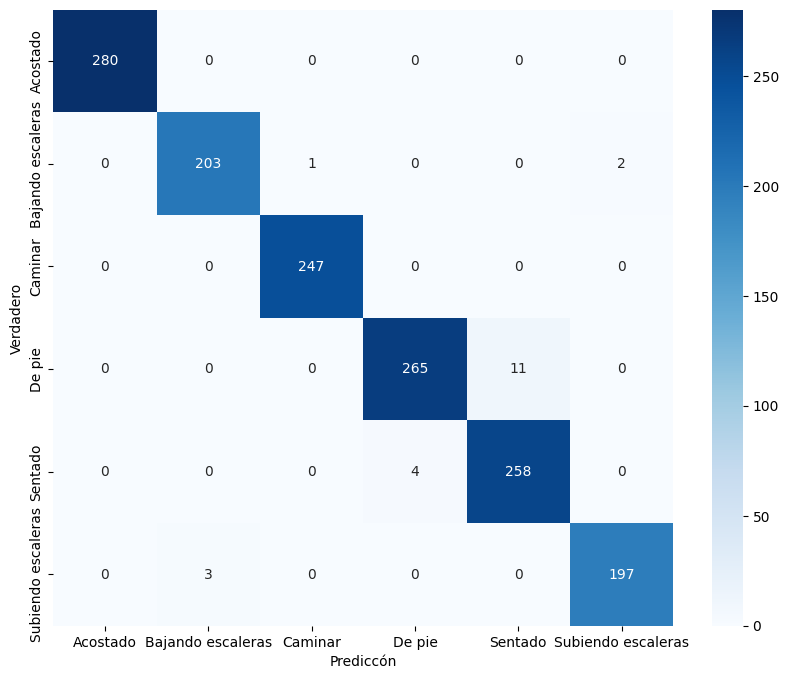

In [111]:
# Graficar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Prediccón')
plt.ylabel('Verdadero')
plt.show()

Aprendizaje No Supervisado (MMG)

Cambiando algunos parámetros

In [49]:
# Definir una lista de parámetros para probar
n_components_list = [ 5, 6, 7]
covariances = ['full', 'tied', 'diag', 'spherical']

In [53]:
# Función para evaluar el modelo GMM
def evaluate_gmm(n_components, covariance_type):
    model = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=42)
    model.fit(X_train_scaled)

    # Predecir etiquetas para los datos de prueba
    y_pred = model.predict(X_test_scaled)

    # Calcular Silhouette Score
    silhouette_avg = silhouette_score(X_test_scaled, y_pred)

    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calcular accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calcular Classification report
    classification = classification_report(y_test, y_pred)

    return {
        'n_components': n_components,
        'covariance_type': covariance_type,
        'silhouette_score': silhouette_avg,
        'confusion_matrix': conf_matrix,
        'accuracy': accuracy,
        'Classification_report': classification
    }


In [115]:
# Evaluar GMM con diferentes parámetros
gmm_results = []
for n_components in n_components_list:
    for covariance in covariances:
        results = evaluate_gmm(n_components, covariance)
        gmm_results.append(results)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [114]:
# Mostrar resultados
""""
for result in gmm_results:
    print(f"GMM Components: {result['n_components']}, Covariance: {result['covariance_type']}")
    print("Silhouette Score:", result['silhouette_score'])
    print("Confusion Matrix:\n", result['confusion_matrix'])
    print("Accuracy:", result['accuracy'])
    print("Classification Report:", result['Classification_report'])
    print("-" * 50)
"""

'"\nfor result in gmm_results:\n    print(f"GMM Components: {result[\'n_components\']}, Covariance: {result[\'covariance_type\']}")\n    print("Silhouette Score:", result[\'silhouette_score\'])\n    print("Confusion Matrix:\n", result[\'confusion_matrix\'])\n    print("Accuracy:", result[\'accuracy\'])\n    print("Classification Report:", result[\'Classification_report\'])\n    print("-" * 50)\n'

In [93]:
gmm_results_df = pd.DataFrame(gmm_results)
gmm_results_df.sort_values(by = 'accuracy', ascending = False)

,n_components,covariance_type,silhouette_score,confusion_matrix,accuracy,Classification_report
1,5,tied,0.108140,"[[271, 0, 2, 0, 7, 0], [0, 155, 13, 38, 0, 0],...",0.544528,precision recall f1-score ...
5,6,tied,0.110706,"[[255, 0, 0, 0, 5, 20], [0, 154, 15, 37, 0, 0]...",0.542488,precision recall f1-score ...
9,7,tied,0.084317,"[[255, 0, 0, 0, 5, 20, 0], [0, 108, 59, 26, 0,...",0.518015,precision recall f1-score ...
0,5,full,0.111841,"[[254, 0, 14, 0, 12, 0], [0, 175, 31, 0, 0, 0]...",0.517335,precision recall f1-score ...
4,6,full,0.103356,"[[212, 0, 3, 0, 4, 61], [0, 170, 36, 0, 0, 0],...",0.473827,precision recall f1-score ...
8,7,full,0.065142,"[[212, 0, 0, 0, 4, 62, 2], [0, 134, 53, 0, 0, ...",0.464310,precision recall f1-score ...
11,7,spherical,0.062051,"[[213, 0, 0, 5, 1, 61, 0], [0, 116, 25, 39, 0,...",0.426920,precision recall f1-score ...
7,6,spherical,0.088571,"[[213, 0, 0, 5, 1, 61], [0, 119, 40, 47, 0, 0]...",0.417403,precision recall f1-score ...
3,5,spherical,0.108123,"[[126, 0, 0, 5, 149, 0], [0, 118, 40, 48, 0, 0...",0.353501,precision recall f1-score ...
10,7,diag,0.044810,"[[154, 0, 0, 0, 75, 46, 5], [0, 97, 37, 61, 0,...",0.307274,precision recall f1-score ...


In [125]:
# Aplicar GMM
gmm = GaussianMixture(n_components=6, covariance_type='tied',random_state=42)
gmm.fit(X_train_scaled)

GaussianMixture(covariance_type='tied', n_components=6, random_state=42)

In [126]:
# Predecir las etiquetas para el conjunto de prueba
y_pred = gmm.predict(X_test_scaled)


In [127]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo GMM: {accuracy:.2f}')
silhouette_avg = silhouette_score(X_test_scaled, y_pred)
silhouette_avg

Precisión del modelo GMM: 0.54


0.11070586444533606

In [173]:
# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# Imprimir el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Matriz de Confusión:
[[255   0   0   0   5  20]
 [  0 154  15  37   0   0]
 [  0  85 149  13   0   0]
 [  0   0   0   0 267   9]
 [  8   0   0   0 240  14]
 [  0  25 173   2   0   0]]

Reporte de Clasificación:
                    precision    recall  f1-score   support

          Acostado       0.97      0.91      0.94       280
 Bajando escaleras       0.58      0.75      0.66       206
           Caminar       0.44      0.60      0.51       247
            De pie       0.00      0.00      0.00       276
           Sentado       0.47      0.92      0.62       262
Subiendo escaleras       0.00      0.00      0.00       200

          accuracy                           0.54      1471
         macro avg       0.41      0.53      0.45      1471
      weighted avg       0.42      0.54      0.47      1471



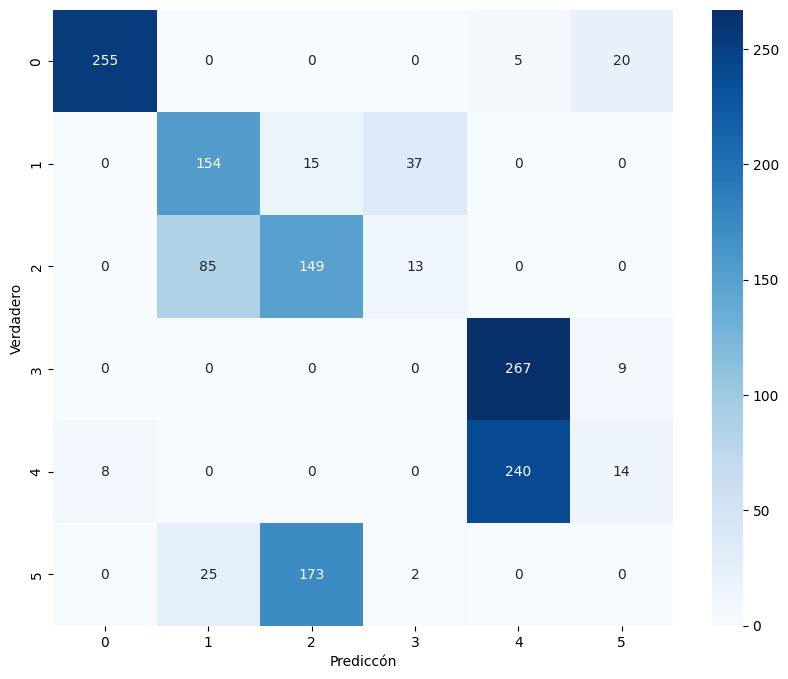

In [166]:
# Graficar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Prediccón')
plt.ylabel('Verdadero')
plt.show()

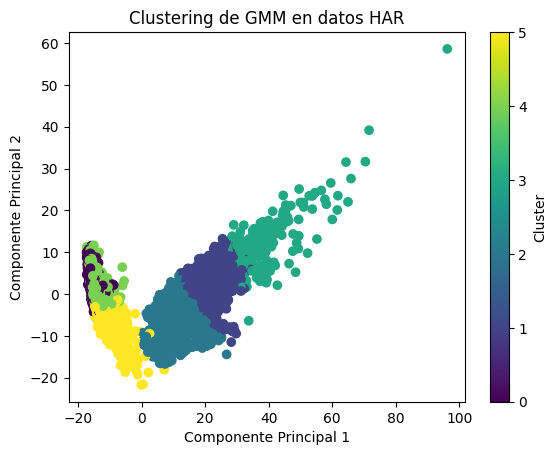

In [130]:
# Visualizar algunos resultados (utilizando solo dos componentes principales para una visualización simplificada)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('Clustering de GMM en datos HAR')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()